<a href="https://colab.research.google.com/github/willvw/DataSci101/blob/main/Copy_of_hw5_wn25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5



This assignment will continue to use the American Community Survey (ACS) from the US Census.
You will need to refer to the documentation to know what the ACS variable names mean. You can find a copy of the codebook in the [Lab 4 folder on Google Drive](https://drive.google.com/drive/folders/1Sq3OGSlwu9qXAZl7rD2AQJk8Mwj-jTkl)


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
acs = pd.read_csv("https://github.com/UM-Data-Science-101/homework-05/raw/refs/heads/main/pums_short.csv.gz")

## Question 1: Working with missing data

### Q1.a

In the previous lab we counted the number of missing values for the `"RNTP"` column using

In [3]:
acs["RNTP"].isna().sum()

202728

Repeat for the `"VALP"` column. (If you want, you can compute totals for both `"VALP"` and `"RNTP"` simultaneously.)

In [4]:
acs["VALP"].isna().sum()

97644

Print out the total number of rows in the `acs` table. Comment on what you notice about the total number of rows and the sum of the missing values for these two columns.

In [5]:
missing_valp = acs["VALP"].isna().sum()
missing_rntp = acs["RNTP"].isna().sum()
total_rows = len(acs)

print(f"Missing values in VALP: {missing_valp}")
print(f"Missing values in RNTP: {missing_rntp}")
print(f"Total rows in acs table: {total_rows}")

Missing values in VALP: 97644
Missing values in RNTP: 202728
Total rows in acs table: 276632


### Q1.b

Write a single line of code that proves that 100% of observations are missing either the `"VALP"` or `"RNTP"` measurements.

In [6]:
acs["VALP"].isna().sum() + acs["RNTP"].isna().sum() == len(acs)

False

### Q1.c

The `.dropna()` method has a `subset = ['column1', 'column2']` argument that allows you to indicate which columns your want to use to control how rows are dropped from the result.

Create a table called `owners` that only includes households that have non-missing `"VALP"` entries.

In [7]:
owners = acs.dropna(subset=['VALP'])

Print out the number of rows in this table and verify it matches the number of observations with *non-missing* `"VALP"` entries in `acs`.

In [9]:
hint = pd.Series([True, False, False, True])
~ hint

,0
0,False
1,True
2,True
3,False


In [8]:
owners_row_count = len(owners)
non_missing_valp_count = acs["VALP"].notna().sum()

print(f"Number of rows in owners table: {owners_row_count}")
print(f"Number of non-missing VALP entries in acs: {non_missing_valp_count}")
print(f"The counts match: {owners_row_count == non_missing_valp_count}")

Number of rows in owners table: 178988
Number of non-missing VALP entries in acs: 178988
The counts match: True


### Q1.d

Using the `owners` table, what **proportion** of rows are missing `"HINCP"` values?


In [10]:
missing_hincp_proportion = owners["HINCP"].isna().mean()
print(f"Proportion of rows missing HINCP values: {missing_hincp_proportion:.4f}")

Proportion of rows missing HINCP values: 0.0133


Find the median value of the non-missing values (hint: built in Panadas methods automatically drop missing values).


In [11]:
median_hincp = owners["HINCP"].median()
print(f"Median value of non-missing HINCP: {median_hincp}")

Median value of non-missing HINCP: 75000.0


Using the `.fillna(VALUE, inplace = TRUE)` method, update the `"HINCP"` column of the `owners` table by making any missing values equal to median of the non-missing values.


In [13]:
owners["HINCP"].fillna(owners["HINCP"].median(), inplace=True)

Verify by showing that all of the values are not missing for `"HINCP"`.

In [14]:
missing_hincp_count = owners["HINCP"].isna().sum()
total_rows = len(owners)

print(f"Number of missing HINCP values: {missing_hincp_count}")
print(f"Total number of rows: {total_rows}")
print(f"All HINCP values are non-missing: {missing_hincp_count == 0}")

Number of missing HINCP values: 0
Total number of rows: 178988
All HINCP values are non-missing: True



### Q1.e

Repeat the above steps to create a table `renters` that contains only rows for people who are renting (have non-missing `RNTP` values) and median impute any missing `HINCP` values.

Remember: `renters` and `owners` remove rows on different conditions, thus the numeric summaries for various columns will differ among the `renters` and `owners`. Make sure you use the respective table's median to impute `"HINCP"`.




In [18]:
renters = acs.dropna(subset=['RNTP'])

missing_hincp_proportion = renters["HINCP"].isna().mean()
print(f"Proportion of rows missing HINCP values in renters table: {missing_hincp_proportion:.4f}")

median_hincp_renters = renters["HINCP"].median()
print(f"Median value of non-missing HINCP for renters: {median_hincp_renters}")

renters["HINCP"].fillna(median_hincp_renters, inplace=True)

missing_hincp_count = renters["HINCP"].isna().sum()
total_rows = len(renters)
print(f"Number of missing HINCP values in renters table: {missing_hincp_count}")
print(f"Total number of rows in renters table: {total_rows}")
print(f"All HINCP values are non-missing in renters table: {missing_hincp_count == 0}")

Proportion of rows missing HINCP values in renters table: 0.0563
Median value of non-missing HINCP for renters: 40000.0
Number of missing HINCP values in renters table: 0
Total number of rows in renters table: 73904
All HINCP values are non-missing in renters table: True


For both `owners` and `renters` compute the following quantities for the "HINCP" column.
- mean
- median
- IQR
- standard deviation

Which group has the higher location values? Which group has more spread? Comment briefly on what this means.


Answer: Owners have a much higher median and mean, however, the owners spread is also much larger than that of the renters. The higher spread in homeowners incomes could mean a wider range of property values and appreciation over time. Renters may have more clustered incomes, which could be a sign of income restrictions on rented homes/properties.

In [19]:
import statistics

# For owners
owners_mean = owners["HINCP"].mean()
owners_median = owners["HINCP"].median()
owners_q1 = owners["HINCP"].quantile(0.25)
owners_q3 = owners["HINCP"].quantile(0.75)
owners_iqr = owners_q3 - owners_q1
owners_std = owners["HINCP"].std()

# For renters
renters_mean = renters["HINCP"].mean()
renters_median = renters["HINCP"].median()
renters_q1 = renters["HINCP"].quantile(0.25)
renters_q3 = renters["HINCP"].quantile(0.75)
renters_iqr = renters_q3 - renters_q1
renters_std = renters["HINCP"].std()

print("Owners:")
print(f"Mean: {owners_mean:.2f}")
print(f"Median: {owners_median:.2f}")
print(f"IQR: {owners_iqr:.2f}")
print(f"Standard Deviation: {owners_std:.2f}")

print("\nRenters:")
print(f"Mean: {renters_mean:.2f}")
print(f"Median: {renters_median:.2f}")
print(f"IQR: {renters_iqr:.2f}")
print(f"Standard Deviation: {renters_std:.2f}")

Owners:
Mean: 103101.59
Median: 75000.00
IQR: 85100.00
Standard Deviation: 107811.39

Renters:
Mean: 56607.35
Median: 40000.00
IQR: 49600.00
Standard Deviation: 64594.46


## Question 2: More on distributions

### Q2.a Distributions of number of people in the household

Create a histogram of the number of people in the household (`"NP"`) for the `acs` data. Use the `bins` argument to create a histogram with 20 bins. Briefly discuss the location, spread, and skew of the distribution.

Answer: The spread ranges from 0-9 (about). The center of the distribution appears to be around 2.1-2.2 while also being fairly right skewed. The right skew indicates that while most households have less people, there are some households with more people, creating a right skewed tail.

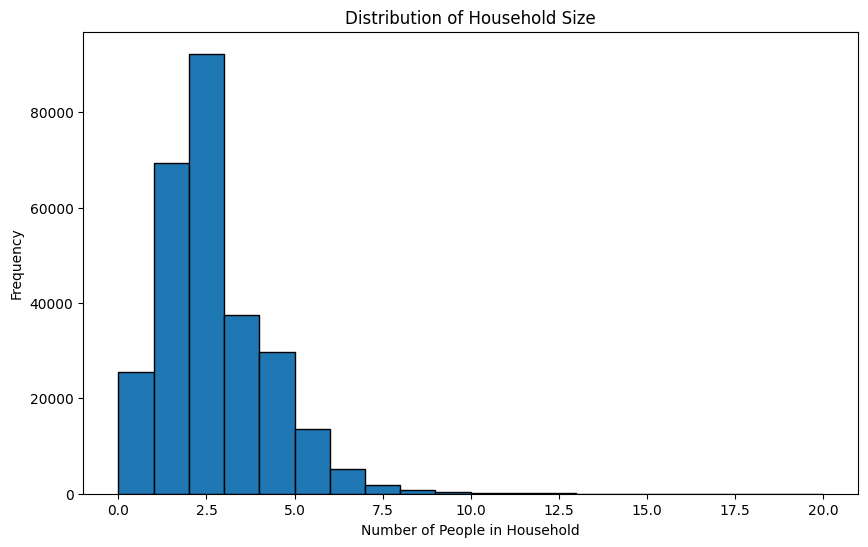

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(acs["NP"], bins=20, edgecolor='black')
plt.title("Distribution of Household Size")
plt.xlabel("Number of People in Household")
plt.ylabel("Frequency")
plt.show()

### Q2.b Summaries of `NP`

Check your answers to the previous question by computing the following for the `"NP"` column:
* mean
* median
* IQR
* standard deviation
* quantile skewness using the 0.25 and 0.75 quantile
* coefficient of skewness

Recall the nifty, built-in method we used in lab to calculate the **coefficient of skewness**!

In [22]:
import numpy as np
from scipy.stats import skew

#calculate
np_mean = acs["NP"].mean()
np_median = acs["NP"].median()
np_q1 = acs["NP"].quantile(0.25)
np_q3 = acs["NP"].quantile(0.75)
np_iqr = np_q3 - np_q1
np_std = acs["NP"].std()

#quantile skewness
quantile_skewness = (np_q3 + np_q1 - 2*np_median) / (np_q3 - np_q1)

#coefficient of skewness using the built-in method
coefficient_skewness = skew(acs["NP"])

print(f"Mean: {np_mean:.2f}")
print(f"Median: {np_median:.2f}")
print(f"IQR: {np_iqr:.2f}")
print(f"Standard Deviation: {np_std:.2f}")
print(f"Quantile Skewness: {quantile_skewness:.2f}")
print(f"Coefficient of Skewness: {coefficient_skewness:.2f}")

Mean: 2.21
Median: 2.00
IQR: 2.00
Standard Deviation: 1.53
Quantile Skewness: 0.00
Coefficient of Skewness: 1.13


### Q2.c Comparing conditional distribution of NP for owners and renters

Create a side-by-side boxplot of the number of people in the household for owners and renters. Comment on what you notice about the distributions of the number of people in the household for owners and renters.

Answer: There is a way wider distribution of household size for owners. This could be due to the fact that they have higher incomes and can support more family members. It also could be due to the fact that owners typically own larger spaces, as opposed to renting a smaller apartment.

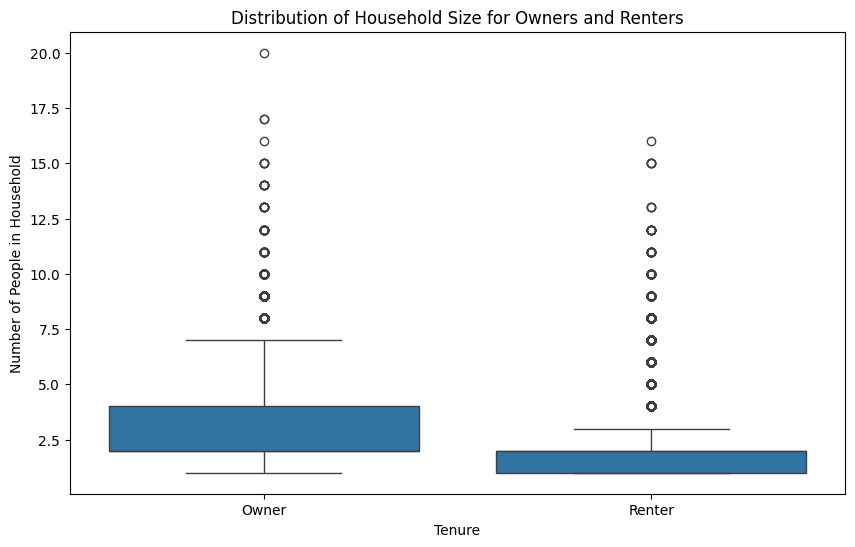

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
tenure_mapping = {1: 'Owner', 2: 'Renter'}
acs['TEN_Label'] = acs['TEN'].map(tenure_mapping)


plt.figure(figsize=(10, 6))
sns.boxplot(x='TEN_Label', y='NP', data=acs, order=['Owner', 'Renter'])
plt.title('Distribution of Household Size for Owners and Renters')
plt.xlabel('Tenure')
plt.ylabel('Number of People in Household')
plt.show()

### Q2.d Effect size of the difference in means

Compute the effect size of the difference in means of the **number of people in the household** for `owners` and `renters`. Use the formula for Cohen's $d$

$$d = \frac{\bar X_1 - \bar X_2}{S_p}$$

where $\bar X_1$ and $\bar X_2$ are the means of the two groups and $S_p$ is the **pooled standard deviation**.





In [25]:
import numpy as np

#means
owners_mean = owners['NP'].mean()
renters_mean = renters['NP'].mean()

#sample sizes
n1 = len(owners)
n2 = len(renters)

#variances
owners_var = owners['NP'].var()
renters_var = renters['NP'].var()

#pooled standard deviation
sp = np.sqrt(((n1 - 1) * owners_var + (n2 - 1) * renters_var) / (n1 + n2 - 2))

#Cohen's d
cohens_d = (owners_mean - renters_mean) / sp

print(f"Owners mean household size: {owners_mean:.2f}")
print(f"Renters mean household size: {renters_mean:.2f}")
print(f"Pooled standard deviation: {sp:.2f}")
print(f"Cohen's d: {cohens_d:.2f}")

Owners mean household size: 2.46
Renters mean household size: 2.17
Pooled standard deviation: 1.45
Cohen's d: 0.20


Using the following table of effect sizes, how would you interpret the effect size of the difference in means of the number of people in the household for owners and renters?

| Effect size | Interpretation |
|-------------|-----------------|
| (0, 0.2]    | Small           |
| (0.2, 0.5]  | Medium          |
| (0.5, 0.1]  | Large           |
| (1, 2]      | Very large      |

Answer: Based on our Cohen's d value of 0.20, we can interpret that being an owner v.s. a renter has a rather small effect on household size.

## Question 3: More on means and medians

For this problem, we will investigate some theoretical properties of means and medians.

### Q3.a

We have already seen that the mean is the unique point $\bar X$ that makes $\sum_{i=1}^n (X_i - \bar X) = 0$. While we didn't introduce it as such, it is also the case that $\bar X$ is the point that **minimizes** $\sum_{i=1}^n (X_i - \bar X)^2$, the sum of squared deviations.

Using the `HINCP` column of the `acs` data, demonstrate that the sum of squared deviations from the mean is less than the sum of squared deviations from the median ($\sum_{i=1}^n (X_i - \tilde X)^2$).

Recall that `x**2` is how we square things in Python.

In [26]:
import numpy as np

#mean and median
hincp_mean = acs['HINCP'].mean()
hincp_median = acs['HINCP'].median()

#sum of squared deviations from mean
sum_sq_dev_mean = np.sum((acs['HINCP'] - hincp_mean)**2)

#sum of squared deviations from median
sum_sq_dev_median = np.sum((acs['HINCP'] - hincp_median)**2)

print(f"Sum of squared deviations from mean: {sum_sq_dev_mean:.2e}")
print(f"Sum of squared deviations from median: {sum_sq_dev_median:.2e}")
print(f"Difference (median - mean): {sum_sq_dev_median - sum_sq_dev_mean:.2e}")
print(f"The sum of squared deviations from the mean is less than from the median: {sum_sq_dev_mean < sum_sq_dev_median}")

Sum of squared deviations from mean: 2.51e+15
Sum of squared deviations from median: 2.69e+15
Difference (median - mean): 1.78e+14
The sum of squared deviations from the mean is less than from the median: True


### Q3.b

Now, using $\bar X$ and $\tilde X$, compute the **sum of absolute distances**, $\sum_{i=1}^n | X_i - \bar X |$ and $\sum_{i=1}^n |X_i - \tilde X|$.

Recall the `.abs()` method can compute the absolute value of a series.

In [27]:
sum_abs_dev_mean = (acs['HINCP'] - hincp_mean).abs().sum()

#sum of absolute deviations from median
sum_abs_dev_median = (acs['HINCP'] - hincp_median).abs().sum()

print(f"Sum of absolute deviations from mean: {sum_abs_dev_mean:.2e}")
print(f"Sum of absolute deviations from median: {sum_abs_dev_median:.2e}")
print(f"Difference (mean - median): {sum_abs_dev_mean - sum_abs_dev_median:.2e}")
print(f"The sum of absolute deviations from the median is less than from the mean: {sum_abs_dev_median < sum_abs_dev_mean}")

Sum of absolute deviations from mean: 1.56e+10
Sum of absolute deviations from median: 1.45e+10
Difference (mean - median): 1.11e+09
The sum of absolute deviations from the median is less than from the mean: True


### Q3.c

While we are not rising to the level of a mathematical proof, what do these result suggest about which type of measure of location would minimize the sum of absolute differences?


Answer: These results suggest that the median minimizes the sum of absolute differences. This is opposite to the mean, which minimizes the sum of squared differences.

This makes the median good measure of central tendency, particularly useful for skewed distributions or data with outliers. This is why the median is preferred where extreme values might disproportionately influence the mean.